### 测试40个时间点中每个时间点的 不同object（不同channel）向量PCA降维后的分布

In [9]:
from utils import r_squared, load_cfg
from dataset import *
from easydict import EasyDict as edict

args = edict()
args.cfg = 'config/Bohr_(0402).yaml'
data_cfg = load_cfg(args.cfg)
train_data, val_data = load_data(cfg=data_cfg['train'], type=data_cfg['type'], phase='trainval', train_val_rate=0.9, seed=1)
train_dataset_bohr = NDTDataset(data=train_data, normalize_method='zscore')
bohr_data = np.stack([train_dataset_bohr.__getitem__(i)[0] for i in range(train_dataset_bohr.__len__())])

args = edict()
args.cfg = 'config/nezha_(0314).yaml'
data_cfg = load_cfg(args.cfg)
train_data, val_data = load_data(cfg=data_cfg['train'], type=data_cfg['type'], phase='trainval', train_val_rate=0.9, seed=1)
train_dataset_nezha = NDTDataset(data=train_data, normalize_method='zscore')
nezha_data = np.stack([train_dataset_nezha.__getitem__(i)[0] for i in range(train_dataset_nezha.__len__())])

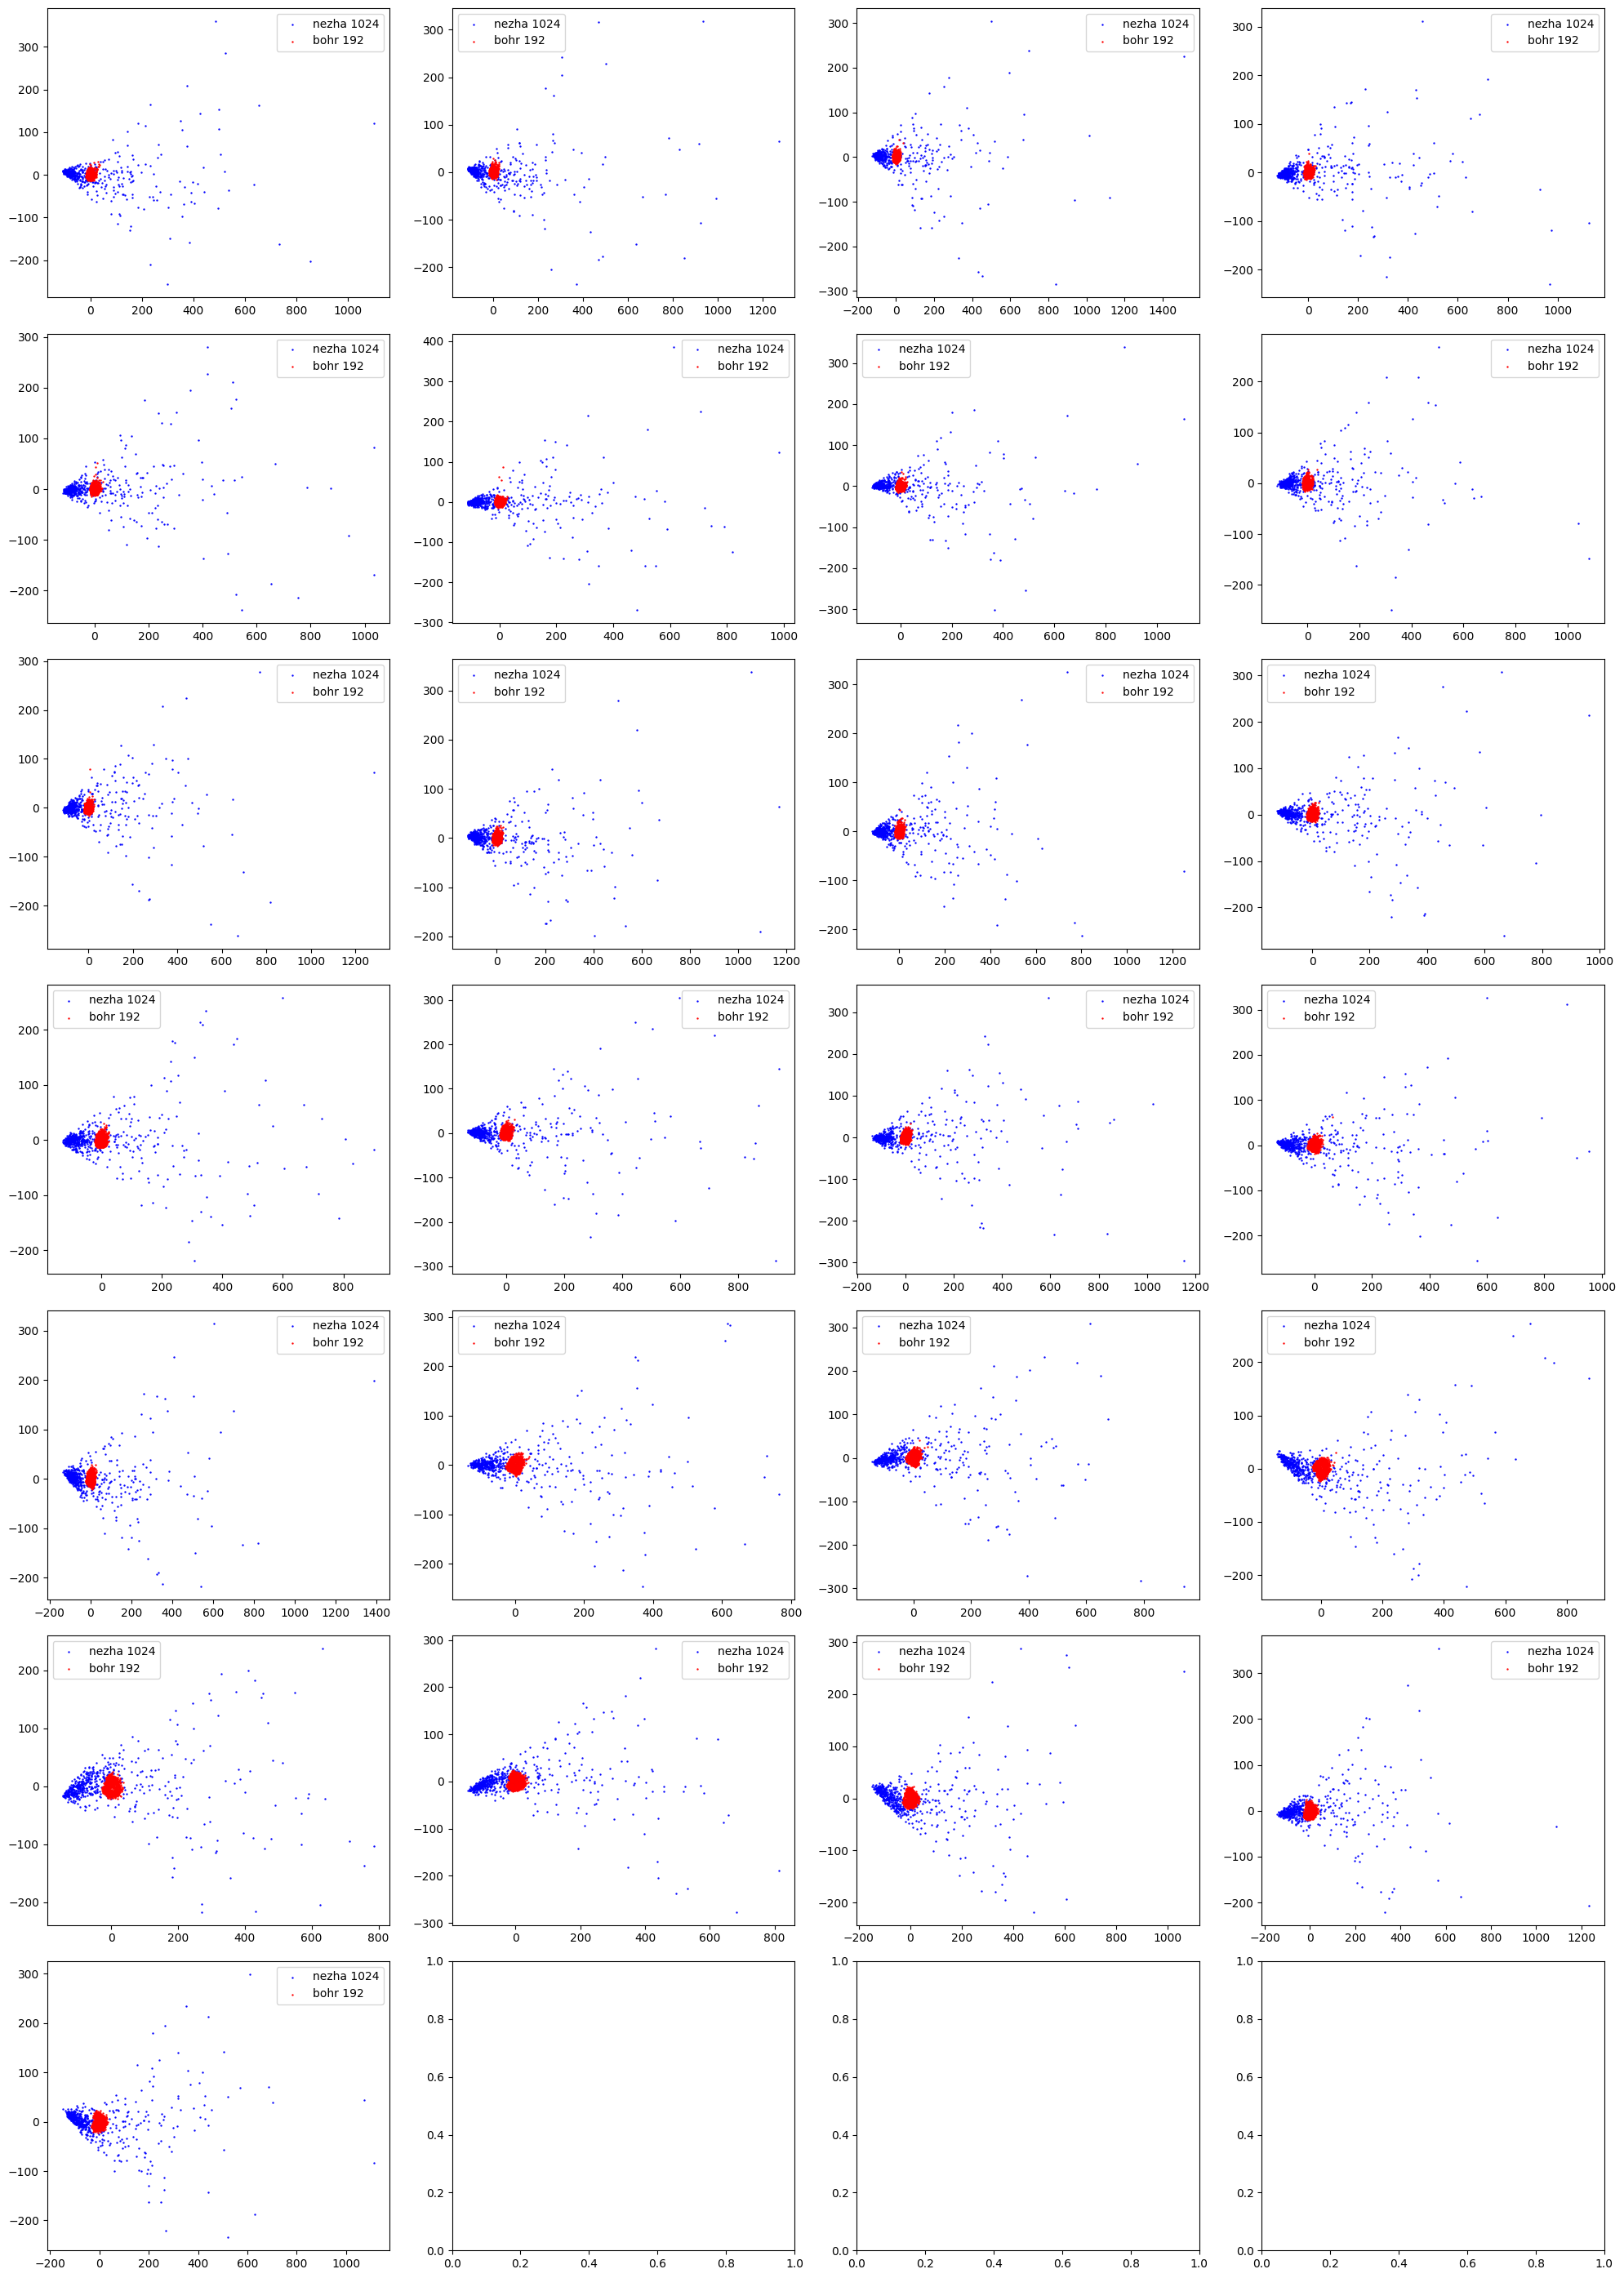

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

seq_len = 25
cols = 4
rows = int(np.ceil(seq_len/cols))
# 创建子图
fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))

for i in range(seq_len):
    row = i // cols
    col = i % cols
    ax = axes[row, col]

    # PCA降维
    pca = PCA(n_components=2)  # 假设我们降到2维
    pca_data_nezha = pca.fit_transform(nezha_data[:, i, :])
    pca_data_bohr = pca.fit_transform(bohr_data[:, i, :])

    axes[row,col].scatter(pca_data_nezha[:,0], pca_data_nezha[:,1], c='blue', label='nezha 1024',s=0.5)
    axes[row,col].legend()

    axes[row,col].scatter(pca_data_bohr[:,0], pca_data_bohr[:,1], c='red', label='bohr 192',s=0.5)
    axes[row,col].legend()

# 调整子图之间的间距
plt.tight_layout()
plt.show()

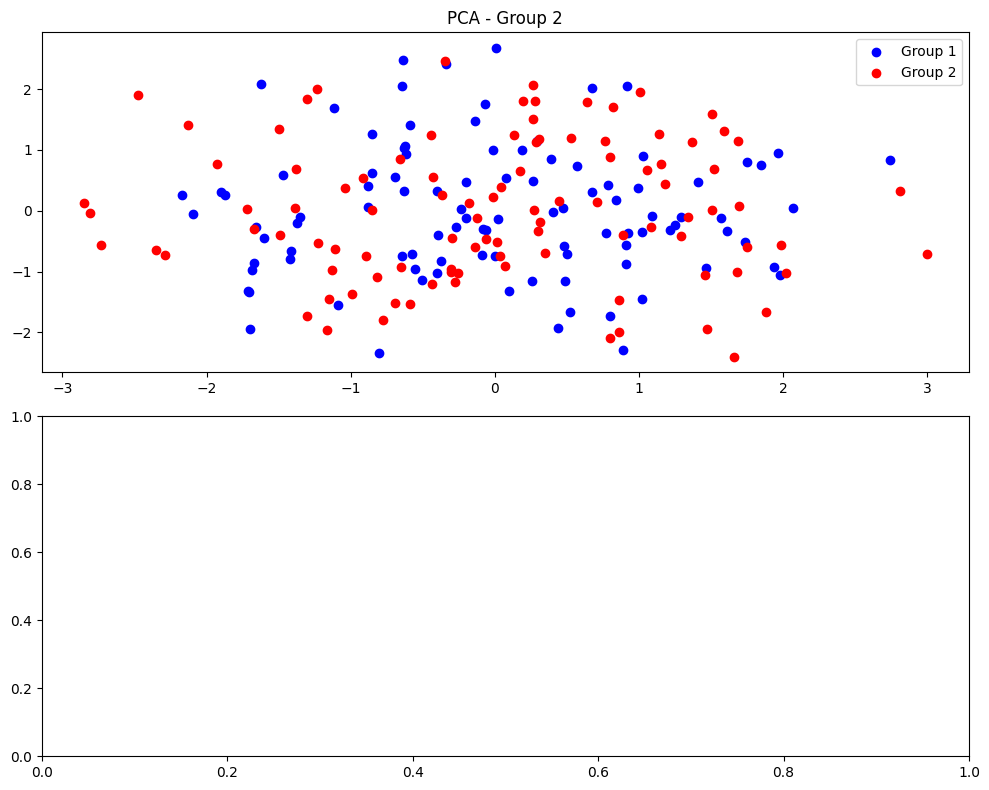

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 假设你已经有了40组数据，每组数据存储在变量data_group_i中
# 这里以两组数据为例，你需要替换为实际的数据
data_group_1 = np.random.rand(100, 5)  # 假设第一组有100个样本，5个特征
data_group_2 = np.random.rand(100, 8)  # 假设第二组也有100个样本，5个特征

# 标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_group_1_scaled = scaler.fit_transform(data_group_1)
data_group_2_scaled = scaler.fit_transform(data_group_2)

# PCA降维
pca = PCA(n_components=3)  # 假设我们降到2维
pca_group_1 = pca.fit_transform(data_group_1_scaled)
pca_group_2 = pca.fit_transform(data_group_2_scaled)

# 可视化
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 创建两个子图

# 第一组数据的可视化
axs[0].scatter(pca_group_1[:, 0], pca_group_1[:, 1], c='blue', label='Group 1')
axs[0].set_title('PCA - Group 1')
axs[0].legend()

# 第二组数据的可视化
axs[0].scatter(pca_group_2[:, 0], pca_group_2[:, 1], c='red', label='Group 2')
axs[0].set_title('PCA - Group 2')
axs[0].legend()

plt.tight_layout()
plt.show()